## Sentiment Analysis of Tweets using Sci-kit Learn & NLTK [Random Forest Classifier]

***

### 1 - `Sci-kit Learn`

- Load Data --- Store data in Python lists.
- Data Preprocessing --- Initialize vectoriser with CountVectorizer. Exclude stop word removal or stemming
- Use fit_transform() to transform our corpus data into feature vectors.
- Split data into training (80%) and test (20%) data
- Model Design --- Random Forest from scikit-learn
- Fit Logistic Regression model
- Model Accuracy
- Print confusion matrix for logistic regression model
- Make prediction using the trained model

In [1]:
import re
import nltk
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### Load Data --- Store data in Python lists.

In [2]:
data = []
data_labels = []


with open("pos_tweets.txt", encoding="utf8") as f:
    for i in f: 
        data.append(i) 
        data_labels.append('pos')


with open("neg_tweets.txt", encoding="utf8") as f:
    for i in f: 
        data.append(i)
        data_labels.append('neg')


#### Split data into training (80%) and test (20%) data.

In [3]:
X_train, X_test, y_train, y_test  = train_test_split(
        data, 
        data_labels,
        train_size=0.80, 
        random_state=1234)

#### Data Preprocessing --- Initialize vectorizer with CountVectorizer. Exclude stop word removal or stemming.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer   

vectorizer = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features=100)
X_train = vectorizer.fit_transform(X_train)

from sklearn.feature_extraction.text import TfidfTransformer
tf_idf = TfidfTransformer()
X_train = tf_idf.fit_transform(X_train)

#### Vectorize test set

In [5]:
X_test = vectorizer.transform(X_test)
X_test = tf_idf.transform(X_test)

#### Model Design --- Random Forest from scikit-learn

In [6]:
model = RandomForestClassifier()

#### Fit Random Forest Classifier

In [7]:
model.fit(X=X_train, y=y_train)

RandomForestClassifier()

#### Model Accuracy

In [8]:
y_pred = model.predict(X_test)

In [9]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)* 100))
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred, average='weighted')* 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, average='weighted')* 100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred, average='weighted')* 100))

Accuracy: 79.05%
Precision: 79.53%
Recall: 79.05%
F1 Score: 77.25%


#### Print confusion matrix for logistic regression model

In [10]:
def show_graph(data, pred):
    confusion = confusion_matrix(data, pred)

    plt.figure(dpi=100)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                xticklabels=['positive','negative'],
                yticklabels=['positive','negative'],
                fmt='d', annot_kws={'fontsize':20})

    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    plt.show()

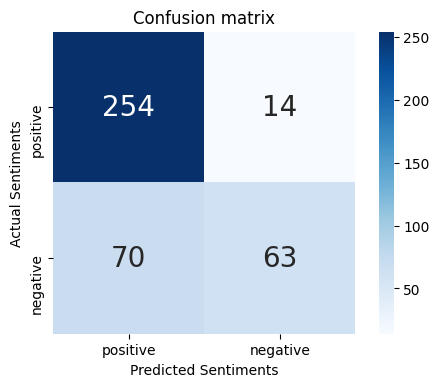

In [11]:
show_graph(y_test, y_pred)

#### Make prediction using the trained model

In [12]:
text = ['This movie was very good and excellent', 
        'Absolutely a joy ride, I am happy', 
        'Steven Seagal was terrible', 
        'I fell asleep halfway through', 
        'I cannot recommend this highly enough', 
        'Steven Seagal was amazingly good, his performance was Oscar-worthy and great.']



reviews = vectorizer.transform(text)         
reviews = tf_idf.transform(reviews) 

In [13]:
pred = model.predict(reviews)

pred

array(['pos', 'neg', 'neg', 'neg', 'neg', 'pos'], dtype='<U3')

In [14]:
for review, category in zip(text, pred):
    print('{}         ======>   {}'.format(review, category))
    print()

This movie was very good and excellent         ======>   pos

Absolutely a joy ride, I am happy         ======>   neg

Steven Seagal was terrible         ======>   neg

I fell asleep halfway through         ======>   neg

I cannot recommend this highly enough         ======>   neg

Steven Seagal was amazingly good, his performance was Oscar-worthy and great.         ======>   pos



### 2 - `NLTK` 

- Import Libraries
- Preprocess data -- use nltk tokenize to map tweets into a dictionary of words mapped to True booleans
- Load Data and use the tokenizer function above
- Split data into training and test data set
- Building Classifier --- NaiveBayesClassifier
- Display words with the highest indicators of a positive or negative label:
- Model Accuracy
- Classification with sample tweets



#### Import Libraries


In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.classify.util import accuracy
from nltk.classify import NaiveBayesClassifier

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanmilee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Preprocess data -- use nltk tokenize to map tweets into a dictionary of words mapped to True booleans


In [17]:
def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})

print(format_sentence("The cat is very cute"))

{'The': True, 'cat': True, 'is': True, 'very': True, 'cute': True}


#### Load Data and use the tokenizer function above

In [18]:
pos = []
with open("./pos_tweets.txt") as f:
    for i in f: 
        pos.append([format_sentence(i), 'pos'])
        
        
neg = []
with open("./neg_tweets.txt", encoding="utf8") as f:
    for i in f: 
        neg.append([format_sentence(i), 'neg'])

#### Split data into training and test data set

In [19]:
training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]

test = pos[int((.8)*len(pos)):] + neg[int((.8)*len(neg)):]

#### Building Classifier --- NaiveBayesClassifier

In [20]:
classifier = NaiveBayesClassifier.train(training)

#### Display words with the highest indicators of a positive or negative label:

- Column 1: Map each word to a True value. 

- Column 2: Shows which label occurs more frequently (label on left is the most associated with the corresponding word).

- Column 3: Count the number of occurences of each word for both labels to compute the ratio between the two




In [21]:
classifier.show_most_informative_features()

Most Informative Features
                      no = True              neg : pos    =     20.0 : 1.0
                    love = True              pos : neg    =     19.0 : 1.0
                 awesome = True              pos : neg    =     17.2 : 1.0
                headache = True              neg : pos    =     16.5 : 1.0
                      Hi = True              pos : neg    =     12.7 : 1.0
                    haha = True              pos : neg    =     10.0 : 1.0
                     New = True              pos : neg    =      9.7 : 1.0
                   Thank = True              pos : neg    =      9.7 : 1.0
               beautiful = True              pos : neg    =      9.7 : 1.0
                     fan = True              pos : neg    =      9.7 : 1.0


#### Model Accuracy

In [22]:
print("Accuracy: {:.2f}%".format(accuracy(classifier, test) * 100))

Accuracy: 83.08%


#### Classification with sample tweets
 

In [23]:
example1 = "Twilio is an awesome company!"

print(classifier.classify(format_sentence(example1)))

pos


In [24]:
example2 = "I'm sad that Twilio doesn't have even more blog posts!"

print(classifier.classify(format_sentence(example2)))

neg


In [25]:
example3 = "I have no headache!"

print(classifier.classify(format_sentence(example3)))

neg
